In [94]:
# Quick attempt at german credit dataset.
# Imports
import numpy as np
import pandas as pd
import scorecardpy as sc
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [95]:
df = pd.read_csv('germancredit.csv')

In [96]:
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [97]:
df.info()
# 8 Numerical Columns
# 13 Categorical Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [98]:
df.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [99]:
bins = sc.woebin(df, 'Default')

[INFO] creating woe binning ...
Binning on 1000 rows and 21 columns in 00:00:10


In [100]:
for k, bin_ in bins.items():
    print(k)
    print(bin_[['woe', 'bin_iv','total_iv']])

property
        woe    bin_iv  total_iv
0 -0.461035  0.054007  0.112638
1  0.028573  0.000190  0.112638
2  0.034191  0.000391  0.112638
3  0.586082  0.058050  0.112638
installment
        woe    bin_iv  total_iv
0 -0.190473  0.012789  0.025569
1 -0.064539  0.000645  0.025569
2  0.157300  0.012135  0.025569
age
        woe    bin_iv  total_iv
0  0.528844  0.057921  0.130499
1 -0.160930  0.002529  0.130499
2  0.142455  0.005359  0.130499
3 -0.872488  0.048610  0.130499
4 -0.212371  0.016080  0.130499
status
        woe    bin_iv  total_iv
0 -0.161641  0.016164  0.044615
1  0.235341  0.017931  0.044615
2  0.441833  0.010520  0.044615
job
        woe    bin_iv  total_iv
0 -0.097164  0.001851  0.008484
1 -0.022780  0.000325  0.008484
2  0.189242  0.006308  0.008484
amount
        woe    bin_iv  total_iv
0  0.033661  0.000305   0.18122
1 -0.728239  0.046815   0.18122
2 -0.258307  0.024109   0.18122
3  0.390539  0.031987   0.18122
4  1.170071  0.078005   0.18122
liable
        woe    bin_iv 

In [101]:
# split into train and test set
train, test = sc.split_df(df, 'Default').values()

In [102]:
# Convert values into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [103]:
y_train = train_woe.loc[:,'Default']
X_train = train_woe.loc[:,train_woe.columns != 'Default']
y_test = test_woe.loc[:,'Default']
X_test = test_woe.loc[:,train_woe.columns != 'Default']

In [125]:
# Fit logit model
lr = sm.Logit(y_train, X_train)
fit = lr.fit(method='bfgs', maxiter=10000)

Optimization terminated successfully.
         Current function value: 0.511501
         Iterations: 168
         Function evaluations: 169
         Gradient evaluations: 169


In [126]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      681
Method:                           MLE   Df Model:                           18
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.1627
Time:                        19:45:34   Log-Likelihood:                -358.05
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 9.510e-21
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age_woe                 0.7533      0.270      2.792      0.005       0.224       1.282
status_woe              1.2773      0.467      2.733      0.006       0.361       2.193
job_woe                 0.5413      1.158      0.467      0.640      -1.729       2.811
purpose_woe             0.9677      0.237      4.081      0.000       0.503       1.432
residence_woe           2.7269      1.572      1.734      0.083      -0.355       5.809
tele_woe                2.9068      1.309      2.221      0.026       0.341       5.472
history_woe             0.6540      0.190      3.447      0.001       0.282       1.026
others_woe              1.5023      0.728      2.063      0.039       0.075       2.930
duration_woe            0.6033      0.197      3.057      0.002       0.217       0.990
savings_woe             0.6397      0.213      3.003      0.003       0.222       1.057
property_woe            0.3682      0.329      1.120      0.263      -0.276       1.012
amount_woe              1.0621      0.254      4.184      0.000       0.565       1.560
liable_woe            -15.9091     14.494     -1.098      0.272     -44.316      12.498
checkingstatus1_woe     0.7751      0.115      6.742      0.000       0.550       1.000
otherplans_woe          1.0345      0.409      2.531      0.011       0.233       1.836
employ_woe              0.2038      0.329      0.620      0.535      -0.440       0.848
cards_woe              -0.3039      0.993     -0.306      0.760      -2.250       1.642
foreign_woe                  0    1.9e+08          0      1.000   -3.72e+08    3.72e+08
installment_woe         2.5136      0.620      4.053      0.000       1.298       3.729
housing_woe             0.5133      0.359      1.429      0.153      -0.191       1.217
=======================================================================================
"""

In [107]:
# Get probabilities
train_pred = lr.predict(fit.params, X_train)
test_pred = lr.predict(fit.params, X_test)

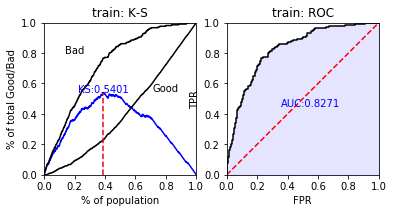

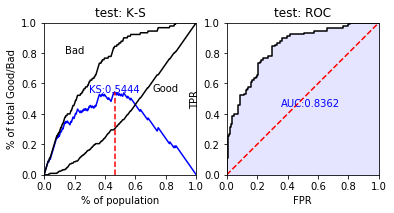

In [110]:
# Plot diagnositcs
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [132]:
# Try a subset of iv values > 0.1
for k, bin_ in bins.items():
    if bin_.total_iv[0] > 0.1:
        print(k)

property
age
amount
purpose
checkingstatus1
history
duration
savings


In [133]:
# 8 cols vs 20
cols = [
    'Default', 'property', 'age', 'amount', 'purpose', 'checkingstatus1', 
    'history', 'duration', 'savings'
]

df_new = df[cols]

In [134]:
# split into train and test set
train_new, test_new = sc.split_df(df_new, 'Default').values()
# Convert values into woe
train_woe_new = sc.woebin_ply(train_new, bins)
test_woe_new = sc.woebin_ply(test_new, bins)
y_train_new = train_woe_new.loc[:,'Default']
X_train_new = train_woe_new.loc[:,train_woe_new.columns != 'Default']
y_test_new = test_woe_new.loc[:,'Default']
X_test_new = test_woe_new.loc[:,test_woe_new.columns != 'Default']
# Fit logit model
lr_new = sm.Logit(y_train_new, X_train_new)
fit_new = lr_new.fit(method='bfgs', maxiter=10000)

[INFO] converting into woe values ...
[INFO] converting into woe values ...
Optimization terminated successfully.
         Current function value: 0.541019
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40


In [135]:
fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.1143
Time:                        19:50:01   Log-Likelihood:                -378.71
converged:                       True   LL-Null:                       -427.61
Covariance Type:            nonrobust   LLR p-value:                 3.094e-18
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
property_woe            0.5914      0.279      2.117      0.034       0.044       1.139
age_woe                 0.8867      0.251      3.538      0.000       0.396       1.378
history_woe             0.6963      0.171      4.062      0.000       0.360       1.032
amount_woe              0.7583      0.236      3.212      0.001       0.296       1.221
purpose_woe             1.0065      0.224      4.492      0.000       0.567       1.446
checkingstatus1_woe     0.7206      0.108      6.662      0.000       0.509       0.933
duration_woe            0.6724      0.186      3.612      0.000       0.308       1.037
savings_woe             0.5553      0.202      2.756      0.006       0.160       0.950
=======================================================================================
"""

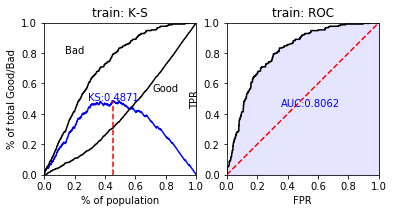

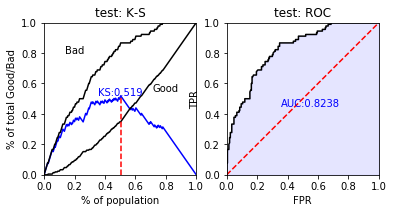

In [136]:
# Get probabilities
train_pred_new = lr_new.predict(fit_new.params, X_train_new)
test_pred_new = lr_new.predict(fit_new.params, X_test_new)
# Plot diagnositcs
train_perf_new = sc.perf_eva(y_train_new, train_pred_new, title = "train")
test_perf_new = sc.perf_eva(y_test_new, test_pred_new, title = "test")

In [137]:
# AUC and K-S is lower in the smaller model but only slightly.
# Going to calculate AIC 
# Get log-likelihood of each

log_ = lr.loglike(fit.params)
log_new = lr_new.loglike(fit_new.params)

AIC = -2*log_ + 2*20
AIC_new = -2*log_new + 2*8

In [138]:
print("AIC: " + str(AIC))
print("AIC_new: " + str(AIC_new))

AIC: 756.1013107562071
AIC_new: 773.4268394634464


In [139]:
# AIC for the full model is still lower which suggests to go with the full
# over the subset taken.